# A4 - Baseline Modeling

#### Throughout the exercise, there are blanks you will need to fill in, these blanks are highlighted with three dashes `---` or an empty cell

In the workshop session we covered three different featurization approaches but didn't build any baseline models. This assignment is your chance to try a few baseline modeling approaches, you'll be able to leverage these for comparison when you come to your final project.

The assignment will be split into:
1. Build a random predictor
2. Build a majority class predictors
3. Build a KNN model

These models are slowly increasing in complexity and likelihood of having reasonable predictions.


## Imports

In [ ]:
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics, neighbors

In [2]:
seed = 13 # DON'T CHANGE

## Load Required Data

In [3]:
train_pa_df = pd.read_csv('../data/train_test_data/train_pa_genes.csv')

In [4]:
def load_data():
    """
    Load the data needed for Assignment 4
    """
    train_pa_df = pd.read_csv('../data/train_test_data/train_pa_genes.csv')
    train_pa_df = train_pa_df.set_index('genome_id')

    y_train = np.load('../data/train_test_data/y_train.npy', allow_pickle=True)
    y_train_ids = np.load('../data/train_test_data/train_ids.npy', allow_pickle=True).astype(str)
    
    return train_pa_df, y_train, y_train_ids

train_pa_df, y_train, y_train_ids = load_data()


In [5]:
train_pa_df.head()

,gb|U00096.3|-|3324062-3324911|ARO:3003386|Ecol_folP_SLF,gb|AP009048.1|+|3760295-3762710|ARO:3003303|Ecol_gyrB_AMU,gb|BA000007.3|+|4990267-4994296|ARO:3003288|Ecol_rpoB_RIF,gb|AH002539.2|+|1760-2945|ARO:3003368|Ecol_EFTu_KIR,gb|AE014075.1|-|3901532-3902762|ARO:3003369|Ecol_EFTu_PLV,gb|U00096.3|-|2336792-2339420|ARO:3003294|Ecol_gyrA_FLO,gb|AE006468.2|-|4038867-4041282|ARO:3003307|Sser_gyrB_FLO,gb|HG738867.1|+|2934266-2935658|ARO:3003890|Ecol_UhpT_FOF,gb|HG738867.1|-|2233288-2234647|ARO:3003889|Ecol_GlpT_FOF,gb|HG738867.1|+|2930707-2931298|ARO:3003893|Ecol_uhpA_FOF,...,gb|X01702.1|+|484-1285|ARO:3002659|APH(6)-Ic,gb|JX259319.1|+|0-681|ARO:3002771|QnrB58,gb|EU675686.2|+|3196-4042|ARO:3002616|aadA16,gb|HQ418999.2|+|0-681|ARO:3002746|QnrB31,gb|JX423831.1|+|2676-3474|ARO:3001778|OXA-232,gb|AY536519.1|+|37-937|ARO:3002372|VEB-3,gb|KJ158441.1|+|2732-3377|ARO:3002789|QnrD2,gb|KF526113.1|+|0-1146|ARO:3002112|CMY-100,gb|X03988.1|+|382-1642|ARO:3000363|EreB,gb|AJ310778.1|+|7003-7573|ARO:3003015|dfrA19
genome_id,,,,,,,,,,,,,,,,,,,,,
562.22444,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42705,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42733,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.42728,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562.45644,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train[0:5]

array([['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S']], dtype=object)

In [7]:
# Preprocess X and y data
X_train = np.array(train_pa_df) # Convert X to numpy array
y_train = y_train.reshape(-1)   # Flatten Y from column matrix to vector

## 1. Build a Random Predictor

Build a simple model (as a function) which randomly predicts the output class

In [8]:
def random_predictor(X_train):
    """
    Random predictor model - generate random predictions for each input sample

    Inputs:
      - X_train (np.array): feature data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    classes = ['S', 'R']
    y_pred = np.random.choice(classes, size=len(X_train))
    return y_pred

#### Q1. Run this random predictor across the training data 100 times, what is the average accuracy on the training dataset?

In [9]:
# Add your code here
random_accuracies = []
for _ in range(100):
    y_pred = random_predictor(X_train)
    accuracy = metrics.accuracy_score(y_train, y_pred)
    random_accuracies.append(accuracy)
    
avg_random_accuracy = np.mean(random_accuracies)
print(f"Average accuracy over 100 runs: {avg_random_accuracy:.4f}")

Average accuracy over 100 runs: 0.4975


--- Add your answer here

Average accuracy over 100 runs is 0.4988. It means that the random predictor is approximately 50% accuracy.
It indicated the two classes ('S' and 'R'); the predictions is equally probability, which is a random guess.

## 2. Build a Majority Class Predictor

This time build a similar function but always predict the majority class
  
- Make sure to get the majority class from the data rather than assume
- Check the imports for a useful function

In [10]:
def majority_predictor(X_train, y_train):
    """
    Majority predictor model - generate predictions for the majority class

    Inputs:
      - X_train (np.array): feature data
      - y_train (np.array): target data

    Outputs:
      - y_pred (np.array): predictions array
    """
    # Add your code here
    majority_class = Counter(y_train).most_common(1)[0][0]
    y_pred = np.full(len(X_train), majority_class)
    return y_pred

#### Q2. Run this majority predictor once, what accuracy is achieved on the training dataset?

In [11]:
# Add your code here
y_pred = majority_predictor(X_train, y_train)
majority_accuracy = metrics.accuracy_score(y_train, y_pred)
print(f"Majority class predictor accuracy: {majority_accuracy:.4f}")

Majority class predictor accuracy: 0.7995


--- Add your answer here
Majority class predictor accuracy is 0.7995. It means that the dataset is imbalanced, where 79% of the data belong to one class. This is better than random guessing, but still no real predictions for minority class is made.

## 3. Build a KNN Model

[Useful documentation for KNN models](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

Build a simple KNN classifier:
- As we're training a model we need to split out some data for testing
- Lets try a few different values of K for n-neighbors

In [12]:
# Randomly select some IDs
idx_all = np.arange(X_train.shape[0])
val_ids = np.random.choice(idx_all, 100, replace=False)
train_ids = idx_all[~np.isin(idx_all, val_ids)]

# Subset data into train/validate
y_train_knn = y_train[train_ids]
X_train_knn = X_train[train_ids]

y_val_knn = y_train[val_ids]
X_val_knn = X_train[val_ids]

#### For every K from 1 to 50: train a KNN Classifier and calculate accuracy on validate
- Fit on train
- Predict on validation
- Calculate accuracy

In [13]:
# Add your code here
# Evaluate KNN for different K values
k_values = range(1, 51)
val_accuracies = []

for k in k_values:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train_knn)
    y_pred = knn.predict(X_val_knn)
    val_accuracies.append(metrics.accuracy_score(y_val_knn, y_pred))


In [14]:
# Find optimal K
optimal_k = k_values[np.argmax(val_accuracies)]
max_accuracy = max(val_accuracies)
print(f"Optimal K: {optimal_k} with validation accuracy: {max_accuracy:.4f}")

Optimal K: 3 with validation accuracy: 0.8800


#### Plot the validation accuracy as a function of K
- X axis = K
- Y axis = accuracy
- Rememeber to clearly label your plot

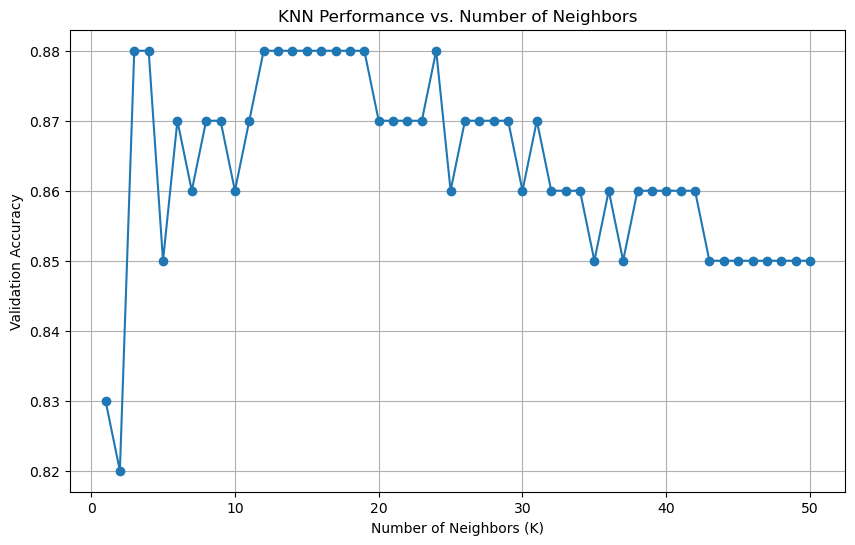

In [15]:
# Add your code here
plt.figure(figsize=(10, 6))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Validation Accuracy')
plt.title('KNN Performance vs. Number of Neighbors')
plt.grid(True)
plt.show()

#### Q3. Comment on the plot above, how does this compare to the random and majority models?

--- Add your answer here

When K is 4, the validation accuracy peaks is around 88%. I see there are fluctuations and potential overfitting at the beginning, but as K increases, validation accuracy is more stable. 

Comparison:
- Random Predictor: 49.88% accuracy
- Majority Class: 79.95% accuracy
- Optimal KNN (K=4): 88.0% validation accuracy

Therefore,  KNN model is better than the other two.